In [1]:
import os
import time
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as sk_mse
from skimage.metrics import structural_similarity as sk_ssim

from tqdm import tqdm

In [2]:
def plot_heatmap(y, x=None, title='temp', figures_dir='figures', filename='temp.png', show=False, save=False):
    # 热图
    m, n = y.shape

    plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(y, cmap='Reds', origin='lower', vmin=-0.1, vmax=1.1)
    if (x is None):
        plt.xticks(np.arange(m), np.arange(m), fontsize=10)
        plt.yticks(np.arange(n), np.arange(m), fontsize=10)
    else:
        plt.xticks(np.arange(m), x, fontsize=10)
        plt.yticks(np.arange(n), x, fontsize=10)

    # 每个方格上标记数值
    for i in range(m):
        for j in range(n):
            plt.text(j, i, '{:.3f}'.format(y[i, j]), 
                     ha="center", va="center", color="black", fontsize=10)

    plt.title(title)

    if (save==True):
        plt.savefig(figures_dir + filename)
    if (show==True):
        plt.show()
    plt.close()

In [3]:
def generate_Ys_list(dim=3, no_repeat=True):
    Ys_list = np.array(list(itertools.product([0, 1], repeat=dim*dim)))
    no_repeat_Ys_list = []
    if (no_repeat == False):
        return Ys_list
    else:
        for Ys in Ys_list:
            Ys_T = Ys.reshape(dim, dim).T.reshape(-1)
            flag = False
            for no_repeat_Ys in no_repeat_Ys_list:
                if ((no_repeat_Ys == Ys_T).all()):
                    flag = True
                    break
            if (flag == False):
                no_repeat_Ys_list.append(Ys)
    return no_repeat_Ys_list


no_repeat_Ys_list = generate_Ys_list(dim=3, no_repeat=True)
color_list = plt.cm.Pastel1(np.arange(9))

In [8]:
def compute_mse_list(file_name):
    Ys_pred_list = np.load(file_name)
    if (np.isnan(Ys_pred_list).any()):
        print(f'{file_name} has nan')
        Ys_pred_list[np.isnan(Ys_pred_list)] = 0.5
    mse_list = []
    for i in range(len(no_repeat_Ys_list)):
        mse_list.append(sk_mse(no_repeat_Ys_list[i], Ys_pred_list[i]))
    return mse_list


def compute_mse_lists(output_dir):
    file_list = sorted(os.listdir(output_dir))
    file_list = [file for file in file_list if file[-3:]=='npy']

    print(file_list)
    mse_lists = []
    for file_name in file_list:
        mse_list = compute_mse_list(f'{output_dir}/{file_name}')
        mse_lists.append(mse_list)
    return mse_lists, file_list

['2_2_fixA_exp_0_20220801_144433.npy', '2_2_fixA_exp_0_20220802_171344.npy', '2_2_fixA_square_0_20220801_144519.npy', '2_2_fixA_square_0_20220802_171008.npy', '2_3_fixA_exp_0_20220801_144559.npy', '2_3_fixA_exp_0_20220802_171410.npy', '2_3_fixA_square_0_20220801_144644.npy', '2_3_fixA_square_0_20220802_171122.npy', '2_4_fixA_exp_0_20220801_144728.npy', '2_4_fixA_exp_0_20220802_171434.npy', '2_4_fixA_square_0_20220801_144814.npy', '2_4_fixA_square_0_20220802_171139.npy']
results/temp/2_4_fixA_square_0_20220802_171139.npy has nan
(12, 288)
[0.05376359 0.06761734 0.08335047 0.11067793 0.02909175 0.03851923
 0.05677492 0.09472875 0.01641007 0.03687043 0.03454363 0.09548426]


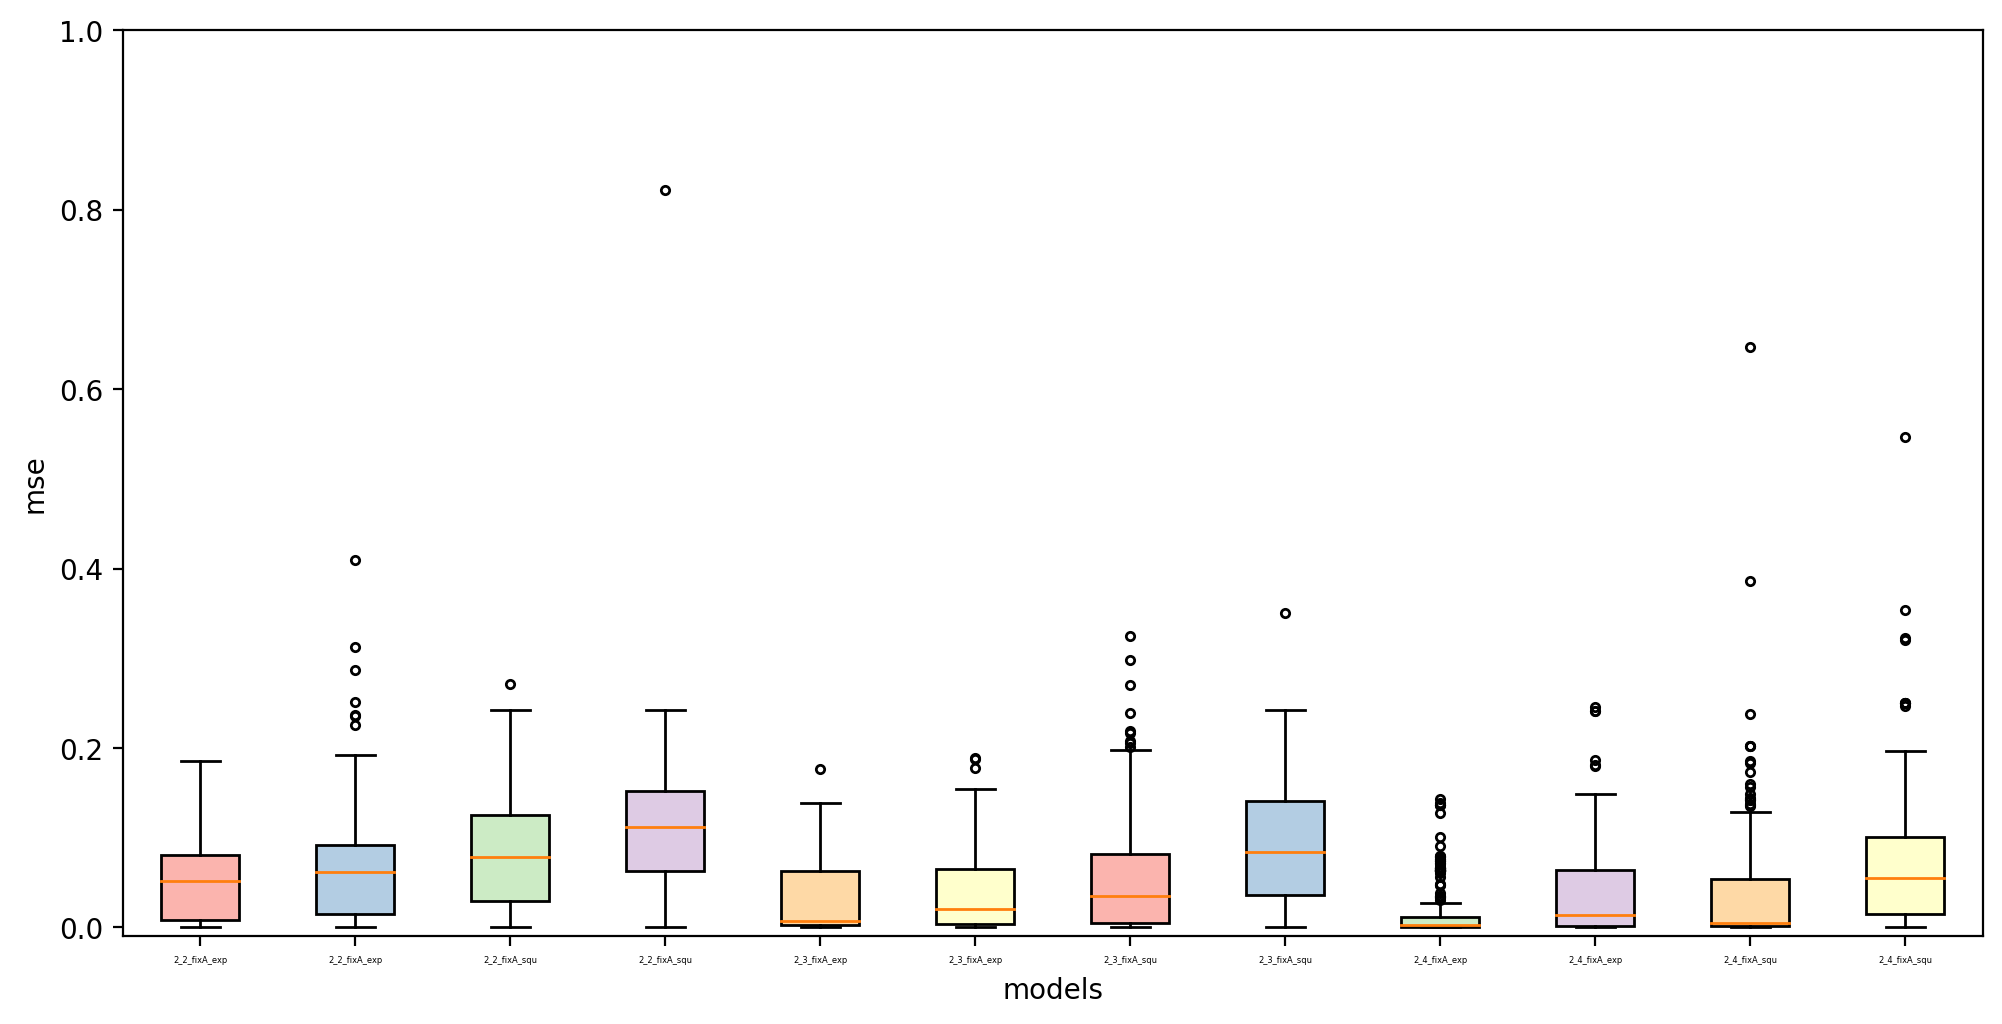

In [14]:
output_dir = 'results/temp'
mse_lists, file_list = compute_mse_lists(output_dir)
mse_lists = np.array(mse_lists)
print(mse_lists.shape)
print(np.mean(mse_lists, axis=1))

labels = [file[:12] for file in file_list]
plt.figure(figsize=(12, 6), dpi=200)
boxplot1 = plt.boxplot(mse_lists.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%6])
plt.xlabel('models')
plt.xticks(fontsize=3)
plt.ylabel('mse')
plt.ylim([-0.01, 1])
plt.show()

In [5]:
output_dir = 'results/tol_1e-4_fixA'
mse_lists, file_list = compute_mse_lists(output_dir)
mse_lists = np.array(mse_lists)
print(mse_lists.shape)
print(np.mean(mse_lists, axis=1))

labels = [file[:12] for file in file_list]
plt.figure(figsize=(12, 6), dpi=200)
boxplot1 = plt.boxplot(mse_lists.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%6])
plt.xlabel('models')
plt.xticks(fontsize=3)
plt.ylabel('mse')
plt.ylim([-0.01, 0.3])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'results/tol_1e-4_fixA'

['2_2_fixA_exp_0_20220722_174206.npy', '2_2_fixA_exp_1_20220722_174603.npy', '2_2_fixA_exp_2_20220722_175009.npy', '2_2_fixA_square_0_20220722_174423.npy', '2_2_fixA_square_1_20220722_174824.npy', '2_2_fixA_square_2_20220722_175223.npy', '2_3_fixA_exp_0_20220722_175405.npy', '2_3_fixA_exp_1_20220722_175845.npy', '2_3_fixA_exp_2_20220722_180326.npy', '2_3_fixA_square_0_20220722_175643.npy', '2_3_fixA_square_1_20220722_180129.npy', '2_3_fixA_square_2_20220722_180610.npy', '2_4_fixA_exp_0_20220722_180813.npy', '2_4_fixA_exp_1_20220722_181259.npy', '2_4_fixA_exp_2_20220722_181756.npy', '2_4_fixA_square_0_20220722_181056.npy', '2_4_fixA_square_1_20220722_181543.npy', '2_4_fixA_square_2_20220722_182047.npy', '2_5_fixA_exp_0_20220722_182259.npy', '2_5_fixA_exp_1_20220722_182800.npy', '2_5_fixA_exp_2_20220722_183302.npy', '2_5_fixA_square_0_20220722_182538.npy', '2_5_fixA_square_1_20220722_183046.npy', '2_5_fixA_square_2_20220722_183549.npy', '2_6_fixA_exp_0_20220722_183809.npy', '2_6_fixA_exp

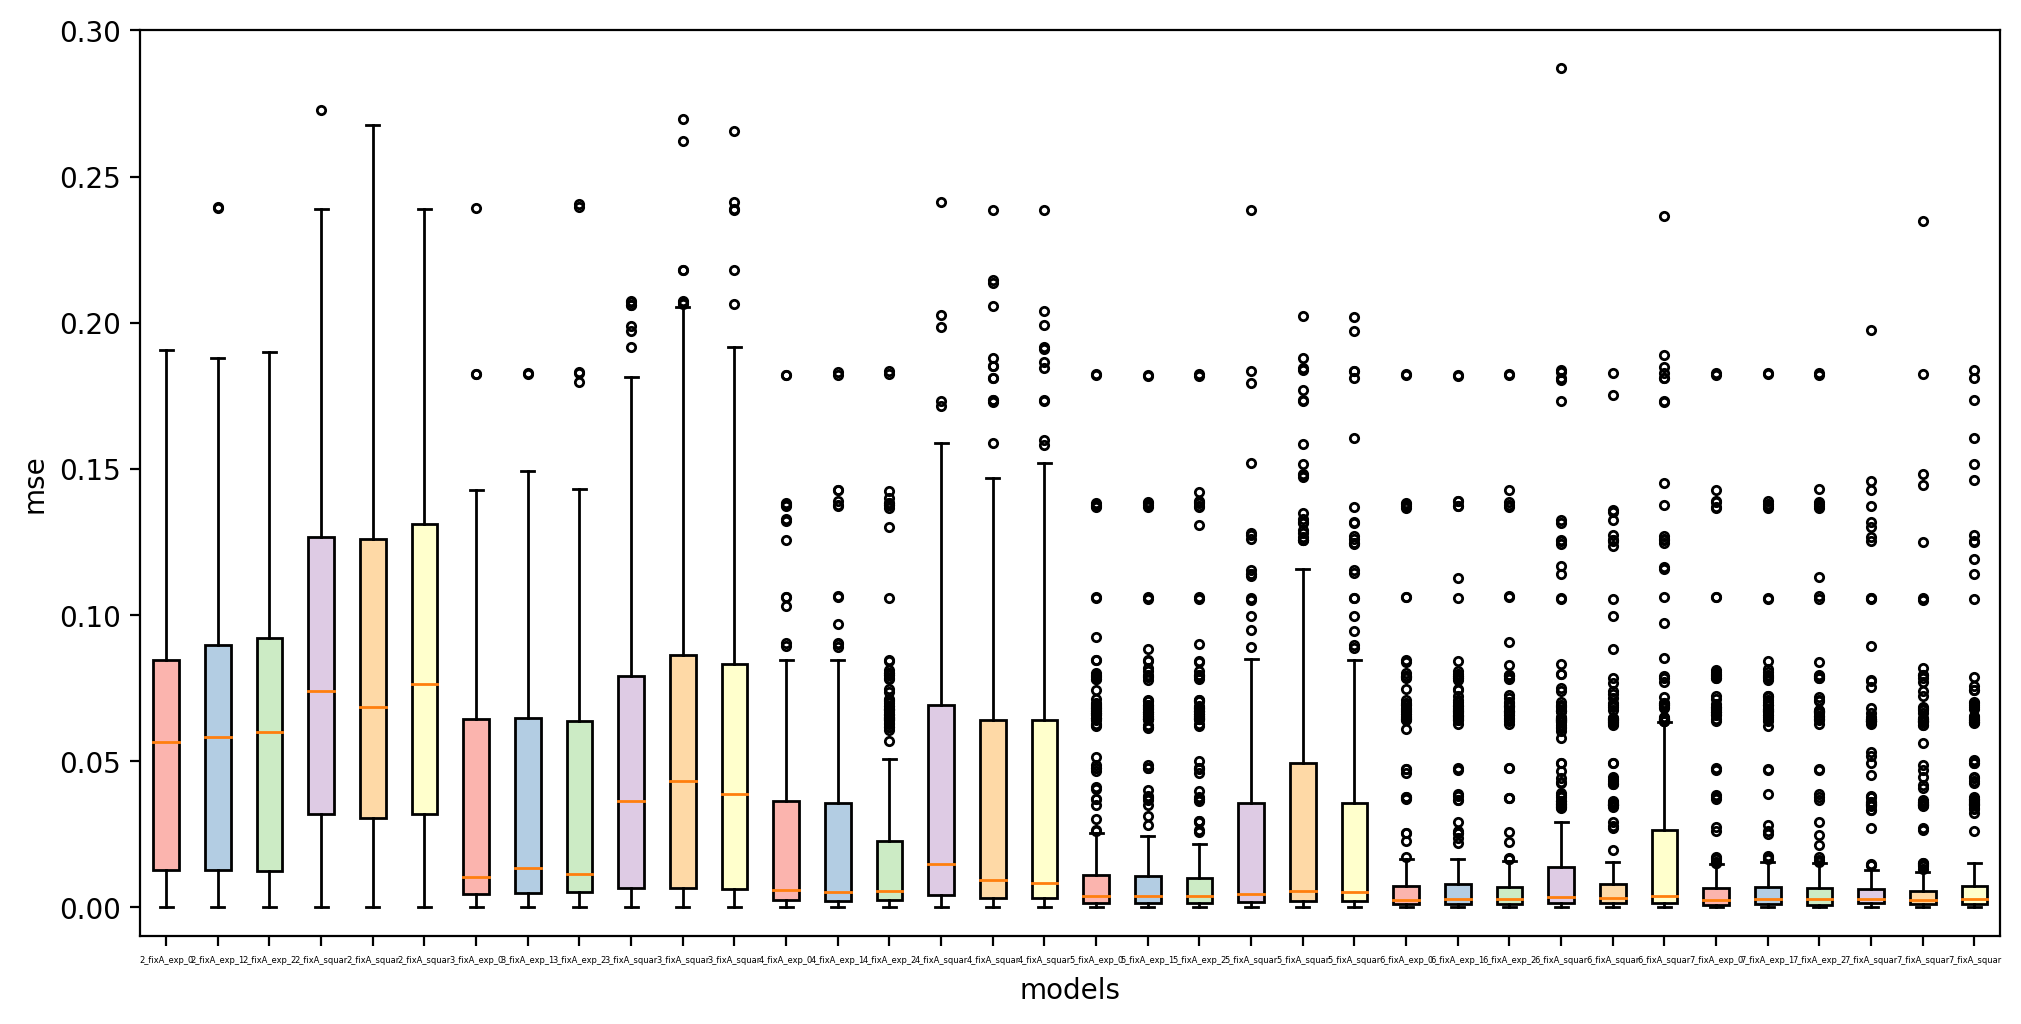

In [43]:
output_dir = 'results/tol_1e-3_fixA'
mse_lists, file_list = compute_mse_lists(output_dir)
mse_lists = np.array(mse_lists)
print(mse_lists.shape)
print(np.mean(mse_lists, axis=1))

labels = [file[2:14] for file in file_list]
plt.figure(figsize=(12, 6), dpi=200)
boxplot1 = plt.boxplot(mse_lists.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%6])
plt.xlabel('models')
plt.xticks(fontsize=3)
plt.ylabel('mse')
plt.ylim([-0.01, 0.3])
plt.show()

['2_2_fixA_exp_0_20220722_174206.npy', '2_2_fixA_exp_1_20220722_174603.npy', '2_2_fixA_exp_2_20220722_175009.npy', '2_2_fixA_square_0_20220722_174423.npy', '2_2_fixA_square_1_20220722_174824.npy', '2_2_fixA_square_2_20220722_175223.npy', '2_3_fixA_exp_0_20220722_175405.npy', '2_3_fixA_exp_1_20220722_175845.npy', '2_3_fixA_exp_2_20220722_180326.npy', '2_3_fixA_square_0_20220722_175643.npy', '2_3_fixA_square_1_20220722_180129.npy', '2_3_fixA_square_2_20220722_180610.npy', '2_4_fixA_exp_0_20220722_180813.npy', '2_4_fixA_exp_1_20220722_181259.npy', '2_4_fixA_exp_2_20220722_181756.npy', '2_4_fixA_square_0_20220722_181056.npy', '2_4_fixA_square_1_20220722_181543.npy', '2_4_fixA_square_2_20220722_182047.npy', '2_5_fixA_exp_0_20220722_182259.npy', '2_5_fixA_exp_1_20220722_182800.npy', '2_5_fixA_exp_2_20220722_183302.npy', '2_5_fixA_square_0_20220722_182538.npy', '2_5_fixA_square_1_20220722_183046.npy', '2_5_fixA_square_2_20220722_183549.npy', '2_6_fixA_exp_0_20220722_183809.npy', '2_6_fixA_exp

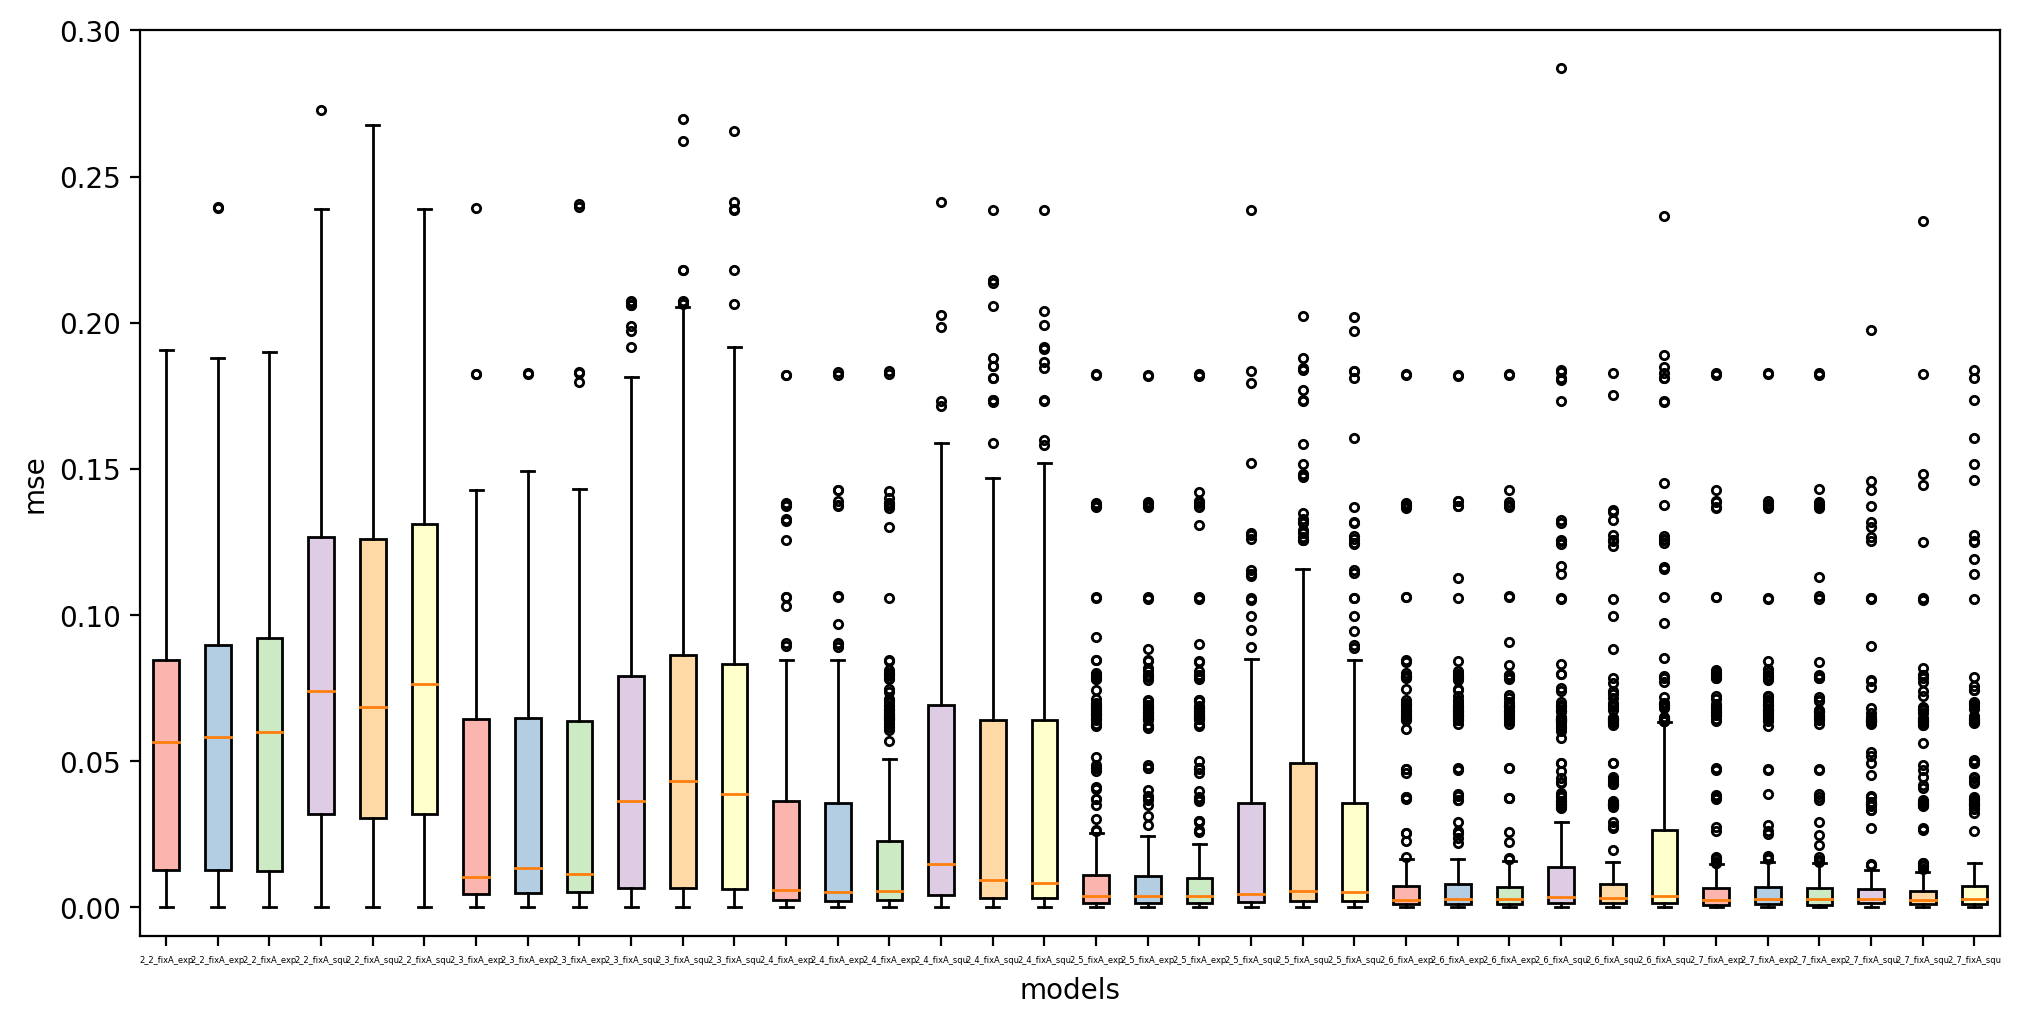

In [44]:
output_dir = 'results/tol_1e-3_fixA'
mse_lists, file_list = compute_mse_lists(output_dir)
mse_lists = np.array(mse_lists)
print(mse_lists.shape)
print(np.mean(mse_lists, axis=1))

labels = [file[:12] for file in file_list]
plt.figure(figsize=(12, 6), dpi=200)
boxplot1 = plt.boxplot(mse_lists.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%6])
plt.xlabel('models')
plt.xticks(fontsize=3)
plt.ylabel('mse')
plt.ylim([-0.01, 0.3])
plt.show()

['2v2_20220715_225709.npy', '2v2_20220716_003932.npy', '2v2_20220716_021923.npy', '2v3_20220715_230604.npy', '2v3_20220716_004837.npy', '2v3_20220716_022844.npy', '2v4_20220715_231733.npy', '2v4_20220716_005955.npy', '2v4_20220716_024017.npy', '2v5_20220715_233340.npy', '2v5_20220716_011610.npy', '2v5_20220716_025618.npy', '2v6_20220715_235605.npy', '2v6_20220716_013802.npy', '2v6_20220716_031758.npy']
(15, 288)


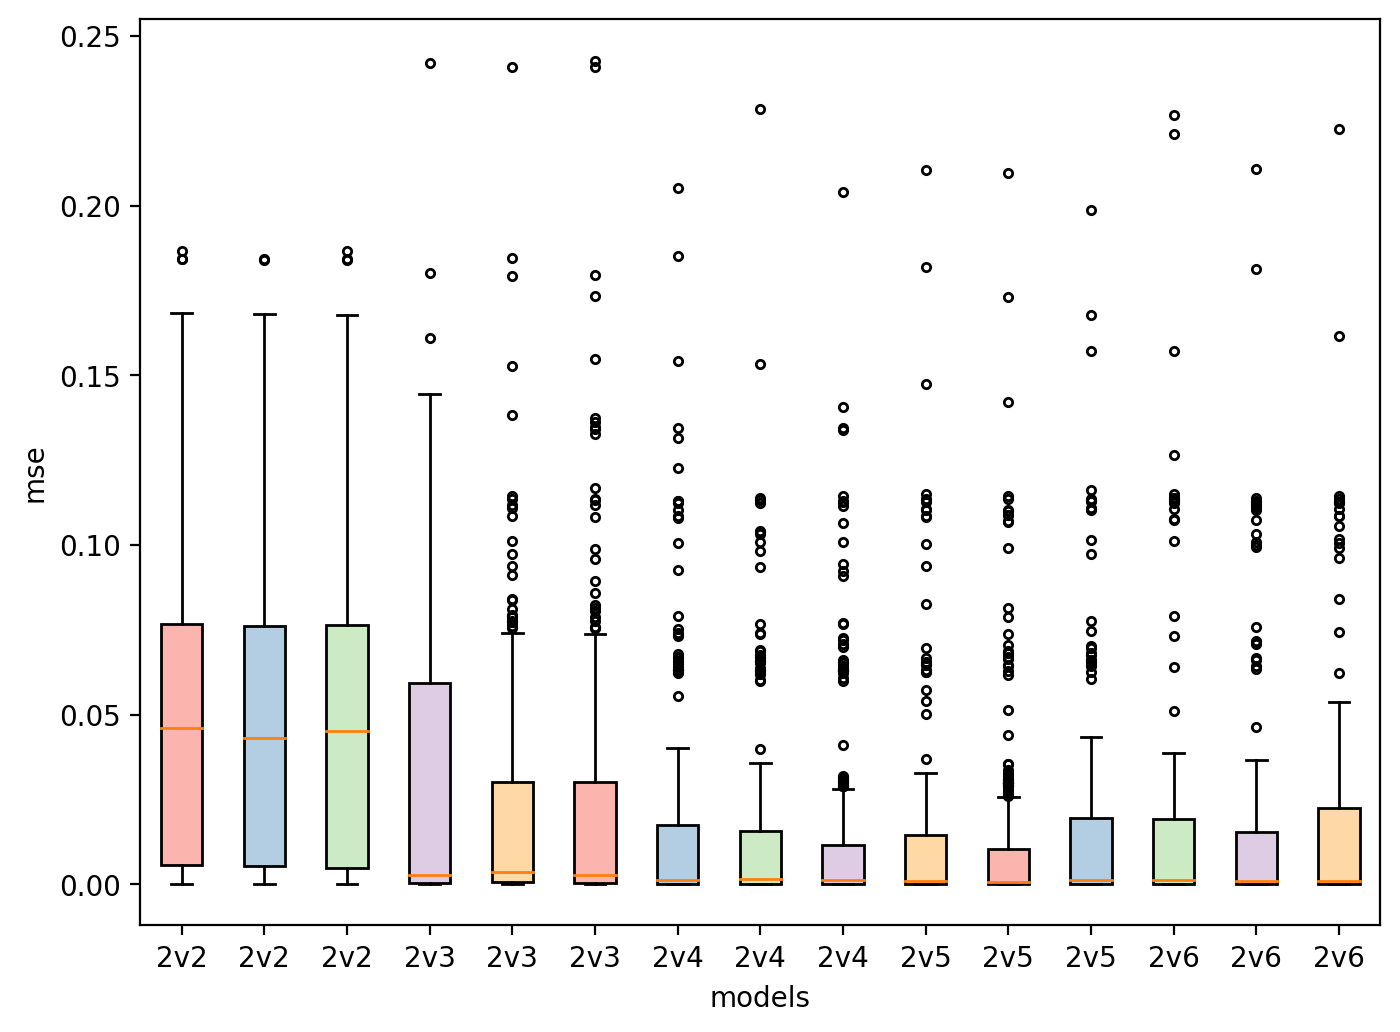

In [36]:
output_dir = 'results/default_012'
mse_lists, file_list = compute_mse_lists(output_dir)
mse_lists = np.array(mse_lists)
print(mse_lists.shape)


labels = [file[:3] for file in file_list]
plt.figure(figsize=(8, 6), dpi=200)
boxplot1 = plt.boxplot(mse_lists.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%5])
plt.xlabel('models')
plt.ylabel('mse')
plt.show()

['2_2_fixA_exp_0_20220722_174206.npy', '2_2_fixA_exp_1_20220722_174603.npy', '2_2_fixA_exp_2_20220722_175009.npy', '2_2_fixA_square_0_20220722_174423.npy', '2_2_fixA_square_1_20220722_174824.npy', '2_2_fixA_square_2_20220722_175223.npy', '2_3_fixA_exp_0_20220722_175405.npy', '2_3_fixA_exp_1_20220722_175845.npy', '2_3_fixA_exp_2_20220722_180326.npy', '2_3_fixA_square_0_20220722_175643.npy', '2_3_fixA_square_1_20220722_180129.npy', '2_3_fixA_square_2_20220722_180610.npy', '2_4_fixA_exp_0_20220722_180813.npy', '2_4_fixA_exp_1_20220722_181259.npy', '2_4_fixA_exp_2_20220722_181756.npy', '2_4_fixA_square_0_20220722_181056.npy', '2_4_fixA_square_1_20220722_181543.npy', '2_4_fixA_square_2_20220722_182047.npy', '2_5_fixA_exp_0_20220722_182259.npy', '2_5_fixA_exp_1_20220722_182800.npy', '2_5_fixA_exp_2_20220722_183302.npy', '2_5_fixA_square_0_20220722_182538.npy', '2_5_fixA_square_1_20220722_183046.npy', '2_5_fixA_square_2_20220722_183549.npy', '2_6_fixA_exp_0_20220722_183809.npy', '2_6_fixA_exp

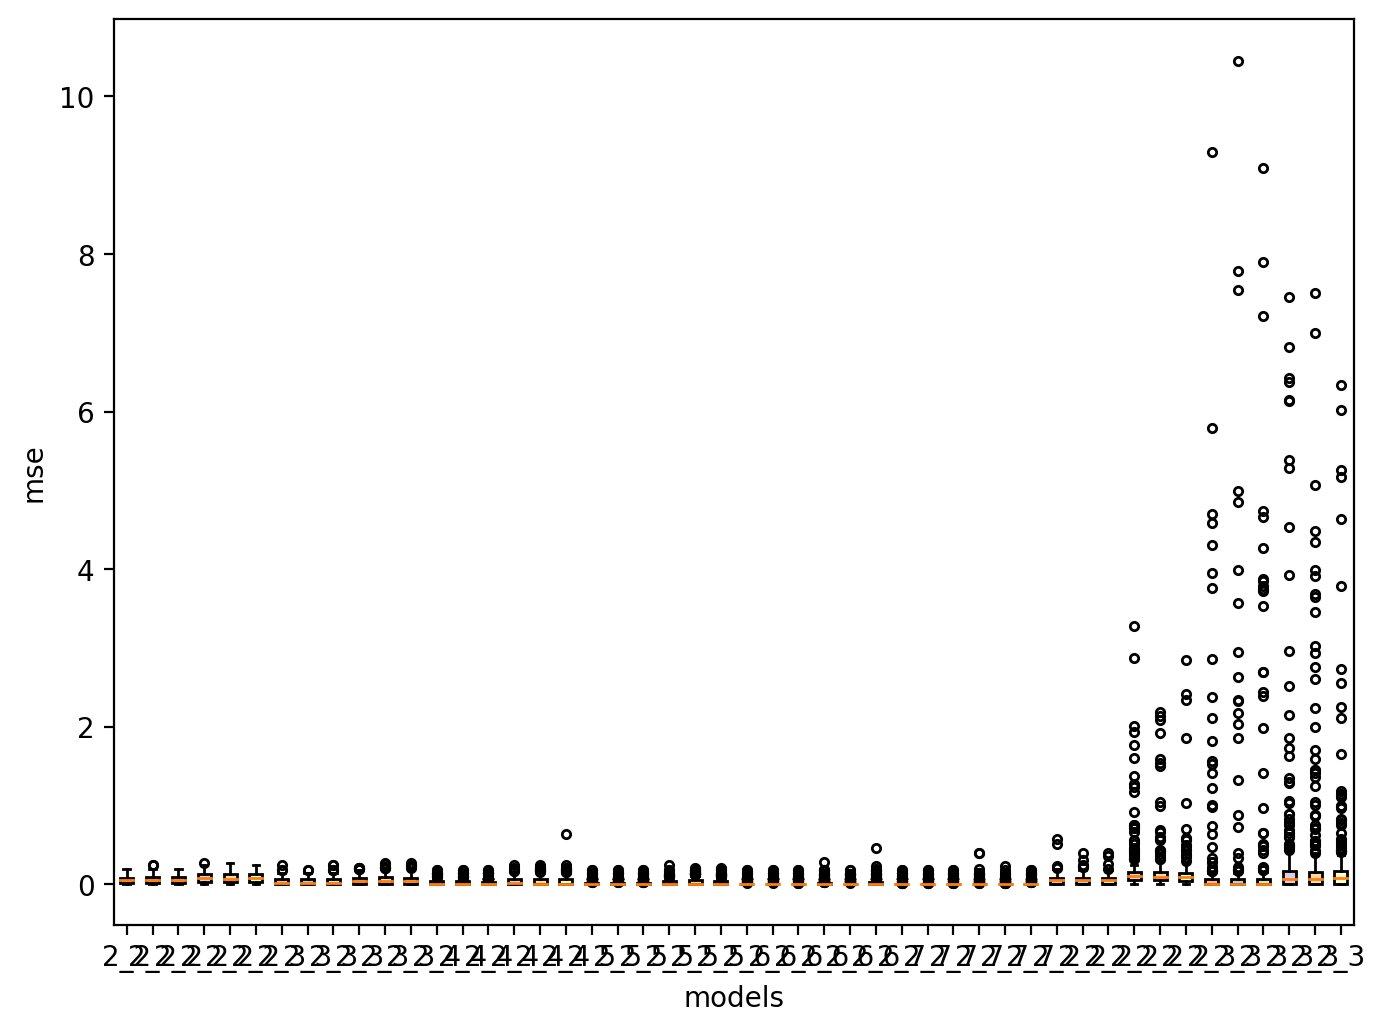

In [8]:
output_dir = 'results/tol_1e-3_fixA'
mse_lists, file_list = compute_mse_lists(output_dir)

output_dir = 'results/tol_1e-4_fixA'
mse_lists2, file_list2 = compute_mse_lists(output_dir)
mse_lists.extend(mse_lists2)
file_list.extend(file_list2)

mse_lists = np.array(mse_lists)
print(mse_lists.shape)


labels = [file[:3] for file in file_list]
plt.figure(figsize=(8, 6), dpi=200)
boxplot1 = plt.boxplot(mse_lists.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%6])
plt.xlabel('models')
plt.ylabel('mse')
plt.show()

['2v12_20220719_202036.npy', '2v12_20220721_023616.npy', '2v6_20220719_175740.npy', '2v6_20220721_001641.npy', '2v8_20220719_183027.npy', '2v8_20220721_004950.npy']
(6, 288)


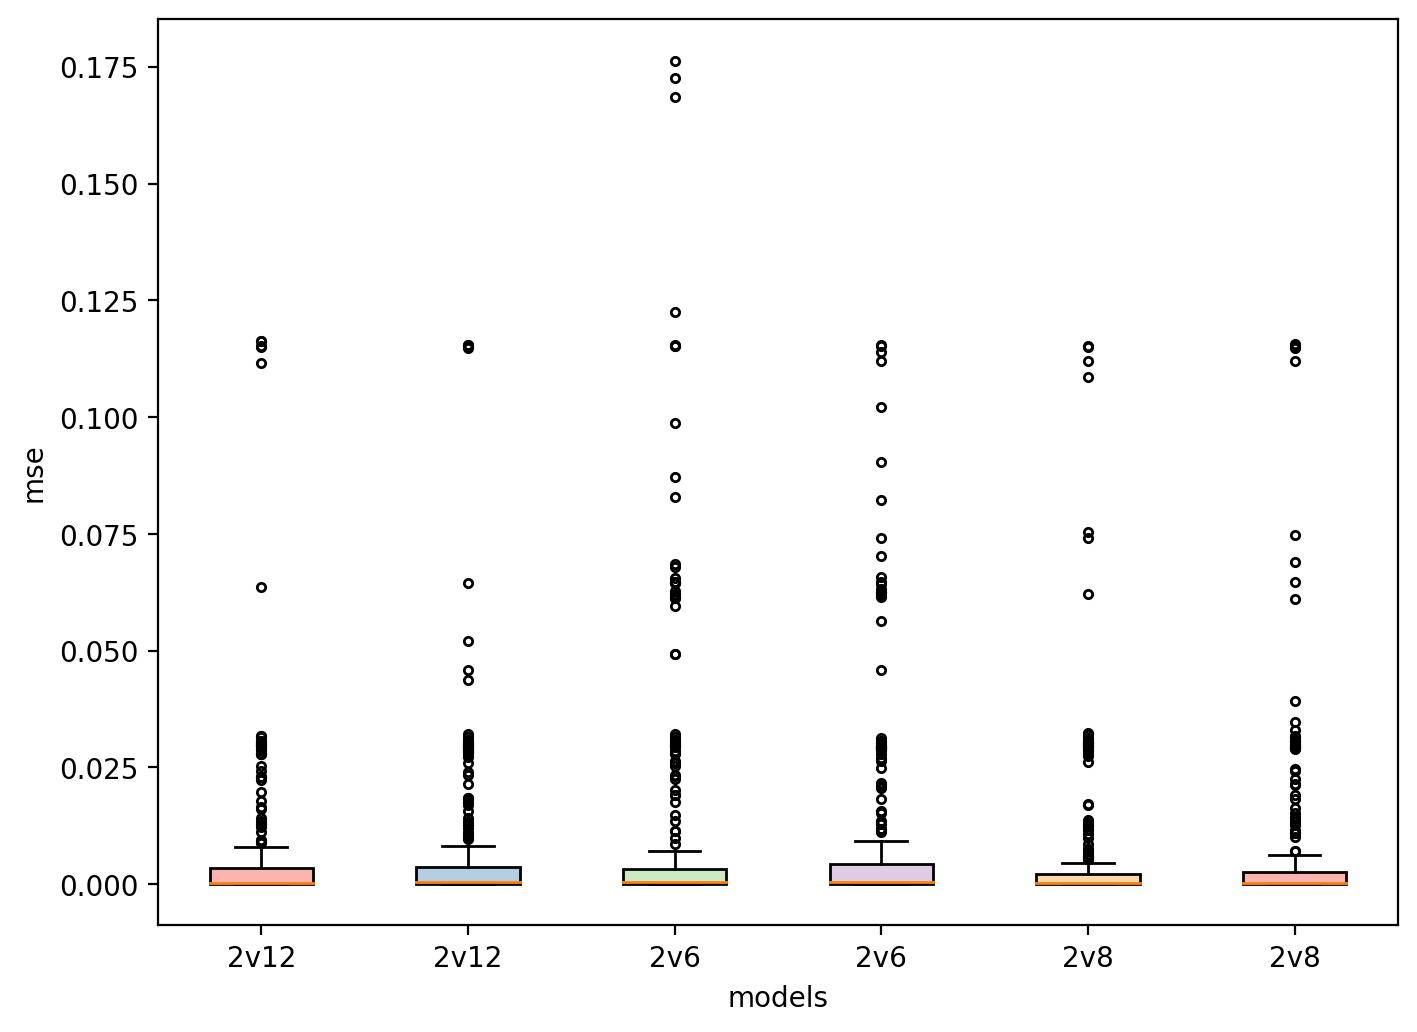

In [7]:
output_dir = 'results/0721_fuxian_nB6812/'
mse_lists, file_list = compute_mse_lists(output_dir)
mse_lists = np.array(mse_lists)
print(mse_lists.shape)


labels = [file.split('_')[0] for file in file_list]
plt.figure(figsize=(8, 6), dpi=200)
boxplot1 = plt.boxplot(mse_lists.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%5])
plt.xlabel('models')
plt.ylabel('mse')
plt.show()

['2v2_20220715_225709.npy', '2v2_20220716_003932.npy', '2v2_20220716_021923.npy', '2v3_20220715_230604.npy', '2v3_20220716_004837.npy', '2v3_20220716_022844.npy', '2v4_20220715_231733.npy', '2v4_20220716_005955.npy', '2v4_20220716_024017.npy', '2v5_20220715_233340.npy', '2v5_20220716_011610.npy', '2v5_20220716_025618.npy', '2v6_20220715_235605.npy', '2v6_20220716_013802.npy', '2v6_20220716_031758.npy']
(15, 288)


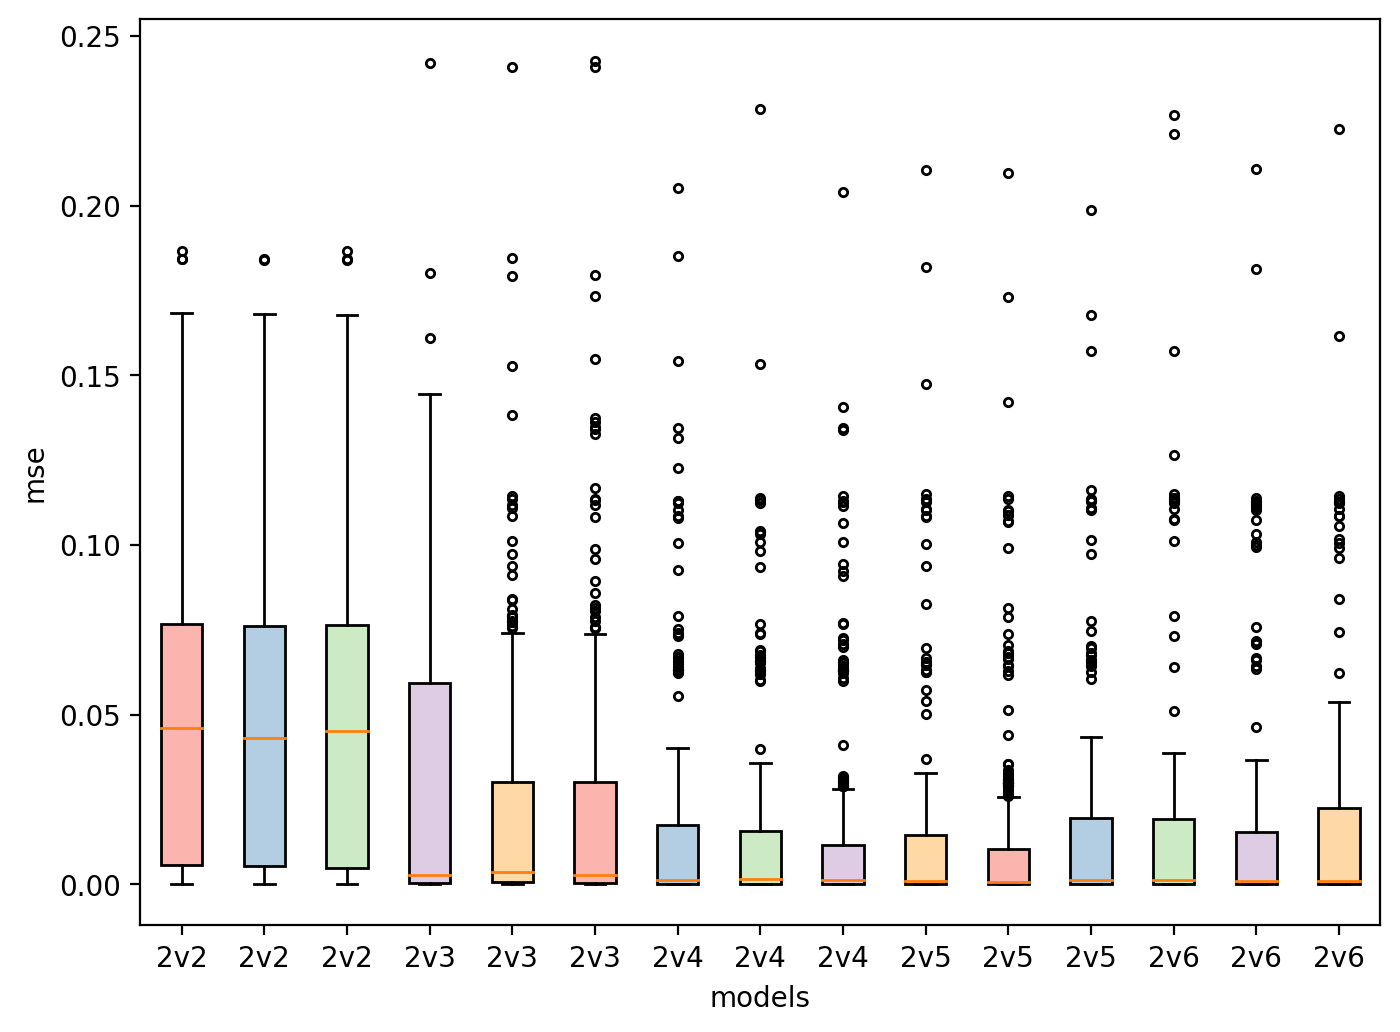

In [14]:
output_dir = 'results/default_012/'
mse_lists, file_list = compute_mse_lists(output_dir)
mse_lists = np.array(mse_lists)
print(mse_lists.shape)


labels = [file.split('_')[0] for file in file_list]
plt.figure(figsize=(8, 6), dpi=200)
boxplot1 = plt.boxplot(mse_lists.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%5])
plt.xlabel('models')
plt.ylabel('mse')
plt.show()

['2v2_20220715_221729.npy', '2v2_20220715_222538.npy', '2v2_20220715_223359.npy', '2v3_20220715_221907.npy', '2v3_20220715_222719.npy', '2v3_20220715_223535.npy', '2v4_20220715_222043.npy', '2v4_20220715_222859.npy', '2v4_20220715_223712.npy', '2v5_20220715_222220.npy', '2v5_20220715_223039.npy', '2v5_20220715_223850.npy', '2v6_20220715_222400.npy', '2v6_20220715_223219.npy', '2v6_20220715_224028.npy']
(15, 288)


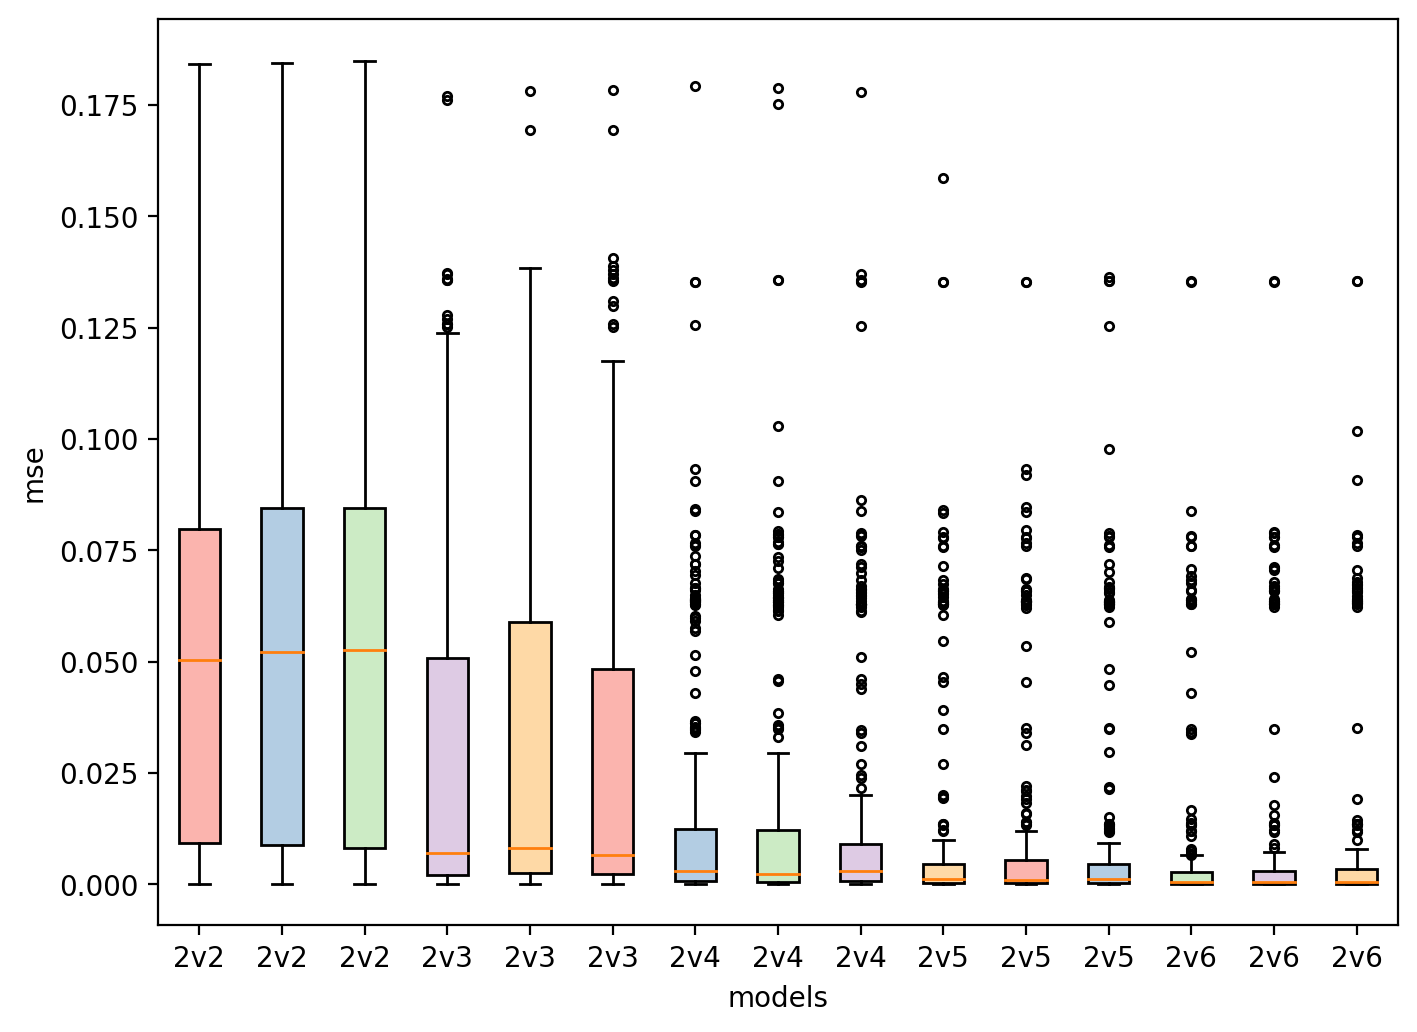

In [18]:
output_dir = 'results/fix_A_012/'
mse_lists, file_list = compute_mse_lists(output_dir)
mse_lists = np.array(mse_lists)
print(mse_lists.shape)


labels = [file.split('_')[0] for file in file_list]
plt.figure(figsize=(8, 6), dpi=200)
boxplot1 = plt.boxplot(mse_lists.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%5])
plt.xlabel('models')
plt.ylabel('mse')
plt.show()

In [3]:
no_repeat_Ys_list = generate_Ys_list(dim=3, no_repeat=True)

mse_lists = []
ssim_lists = []

output_dir = 'results/fix_A_012/'
file_list = sorted(os.listdir(output_dir))
print(file_list)
for file_name in file_list:
    Ys_pred_list = np.load(output_dir + file_name)
    mse_list = []
    ssim_list = []
    for i in range(len(no_repeat_Ys_list)):
        mse_list.append(sk_mse(no_repeat_Ys_list[i], Ys_pred_list[i]))
        ssim_list.append(sk_ssim(no_repeat_Ys_list[i].astype(np.float32), Ys_pred_list[i]))
    mse_lists.append(mse_list)
    ssim_lists.append(ssim_list)


'''output_dir = 'results/fix_A_1/'
file_list = sorted(os.listdir(output_dir))
print(file_list)
for file_name in file_list:
    Ys_pred_list = np.load(output_dir + file_name)
    mse_list = []
    ssim_list = []
    for i in range(len(no_repeat_Ys_list)):
        mse_list.append(sk_mse(no_repeat_Ys_list[i], Ys_pred_list[i]))
        ssim_list.append(sk_ssim(no_repeat_Ys_list[i].astype(np.float32), Ys_pred_list[i]))
    mse_lists.append(mse_list)
    ssim_lists.append(ssim_list)
'''

mse_lists = np.array(mse_lists)
ssim_lists = np.array(ssim_lists)
print(mse_lists.shape)

['2v2_20220715_221729.npy', '2v2_20220715_222538.npy', '2v2_20220715_223359.npy', '2v3_20220715_221907.npy', '2v3_20220715_222719.npy', '2v3_20220715_223535.npy', '2v4_20220715_222043.npy', '2v4_20220715_222859.npy', '2v4_20220715_223712.npy', '2v5_20220715_222220.npy', '2v5_20220715_223039.npy', '2v5_20220715_223850.npy', '2v6_20220715_222400.npy', '2v6_20220715_223219.npy', '2v6_20220715_224028.npy']
(15, 288)


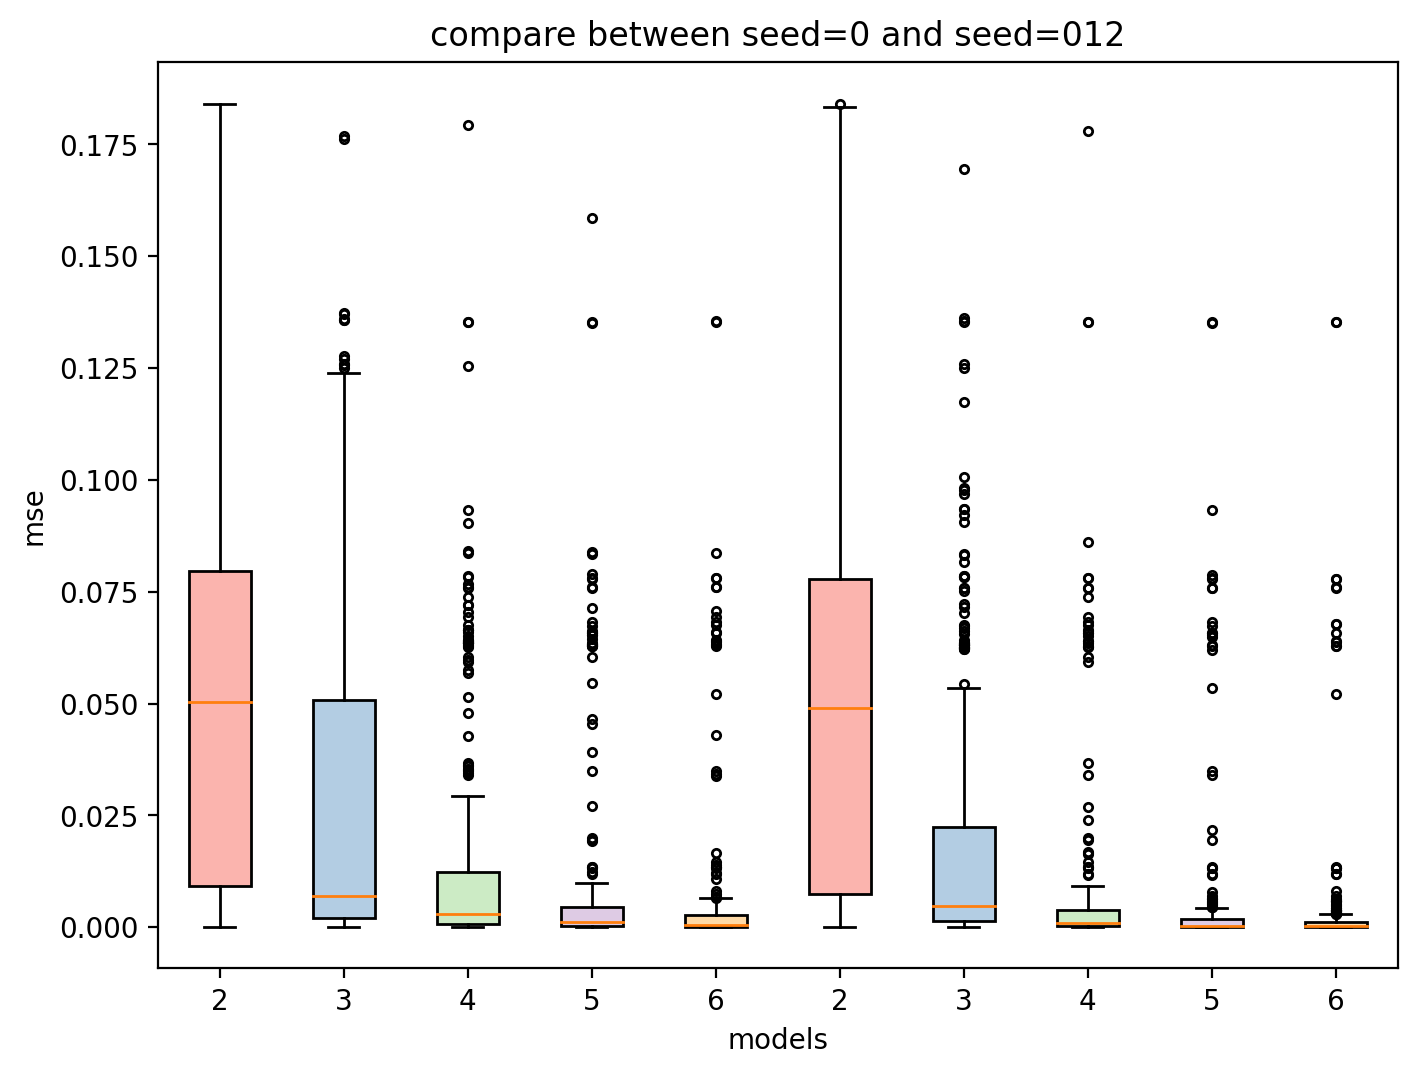

In [4]:
data_0 = mse_lists.reshape(5, 3, -1)[:, 0]
data_1 = mse_lists.reshape(5, 3, -1).min(axis=1)
data_2 = np.concatenate([data_0, data_1])

labels = ['2', '3', '4', '5', '6', '2', '3', '4', '5', '6']

plt.figure(figsize=(8, 6), dpi=200)
boxplot1 = plt.boxplot(data_2.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%5])
plt.xlabel('models')
plt.ylabel('mse')
plt.title('compare between seed=0 and seed=012')
plt.savefig('figures/boxplot.png')
plt.show()

In [5]:
no_repeat_Ys_list = generate_Ys_list(dim=3, no_repeat=True)

mse_lists = []
ssim_lists = []

output_dir = 'results/default_012/'
file_list = sorted(os.listdir(output_dir))
print(file_list)
for file_name in file_list:
    Ys_pred_list = np.load(output_dir + file_name)
    mse_list = []
    ssim_list = []
    for i in range(len(no_repeat_Ys_list)):
        mse_list.append(sk_mse(no_repeat_Ys_list[i], Ys_pred_list[i]))
        ssim_list.append(sk_ssim(no_repeat_Ys_list[i].astype(np.float32), Ys_pred_list[i]))
    mse_lists.append(mse_list)
    ssim_lists.append(ssim_list)


'''output_dir = 'results/fix_A_1/'
file_list = sorted(os.listdir(output_dir))
print(file_list)
for file_name in file_list:
    Ys_pred_list = np.load(output_dir + file_name)
    mse_list = []
    ssim_list = []
    for i in range(len(no_repeat_Ys_list)):
        mse_list.append(sk_mse(no_repeat_Ys_list[i], Ys_pred_list[i]))
        ssim_list.append(sk_ssim(no_repeat_Ys_list[i].astype(np.float32), Ys_pred_list[i]))
    mse_lists.append(mse_list)
    ssim_lists.append(ssim_list)
'''

mse_lists = np.array(mse_lists)
ssim_lists = np.array(ssim_lists)
print(mse_lists.shape)

['2v2_20220715_225709.npy', '2v2_20220716_003932.npy', '2v2_20220716_021923.npy', '2v3_20220715_230604.npy', '2v3_20220716_004837.npy', '2v3_20220716_022844.npy', '2v4_20220715_231733.npy', '2v4_20220716_005955.npy', '2v4_20220716_024017.npy', '2v5_20220715_233340.npy', '2v5_20220716_011610.npy', '2v5_20220716_025618.npy', '2v6_20220715_235605.npy', '2v6_20220716_013802.npy', '2v6_20220716_031758.npy']
(15, 288)


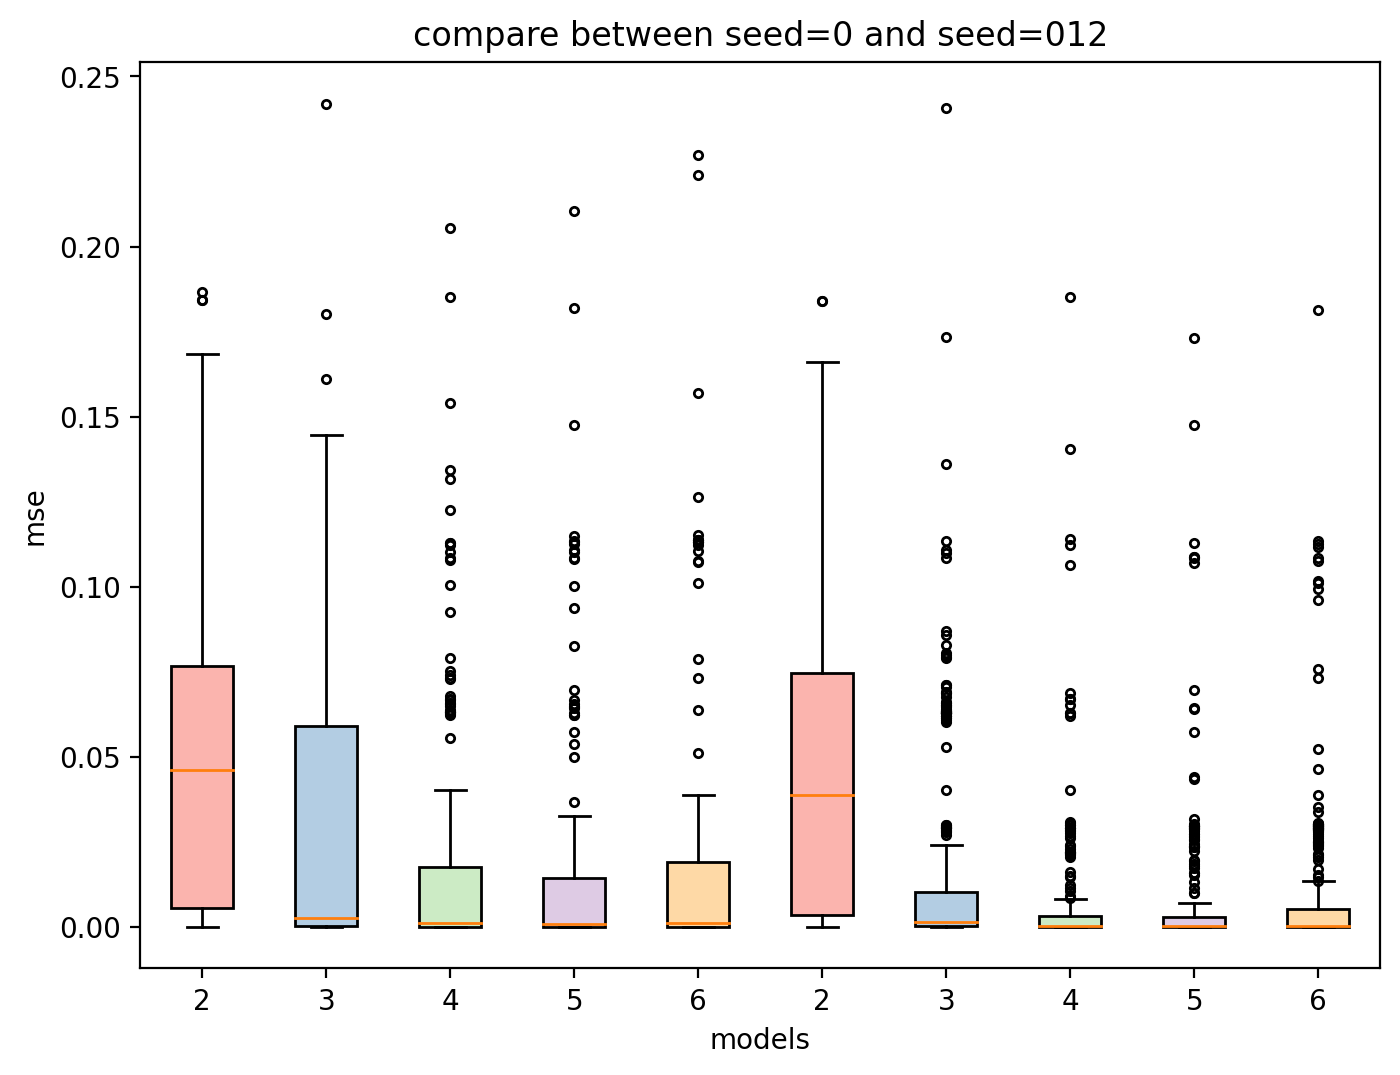

In [6]:
data_3 = mse_lists.reshape(5, 3, -1)[:, 0]
data_4 = mse_lists.reshape(5, 3, -1).min(axis=1)
data_5 = np.concatenate([data_3, data_4])

labels = ['2', '3', '4', '5', '6', '2', '3', '4', '5', '6']

plt.figure(figsize=(8, 6), dpi=200)
boxplot1 = plt.boxplot(data_5.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%5])
plt.xlabel('models')
plt.ylabel('mse')
plt.title('compare between seed=0 and seed=012')
plt.savefig('figures/boxplot.png')
plt.show()

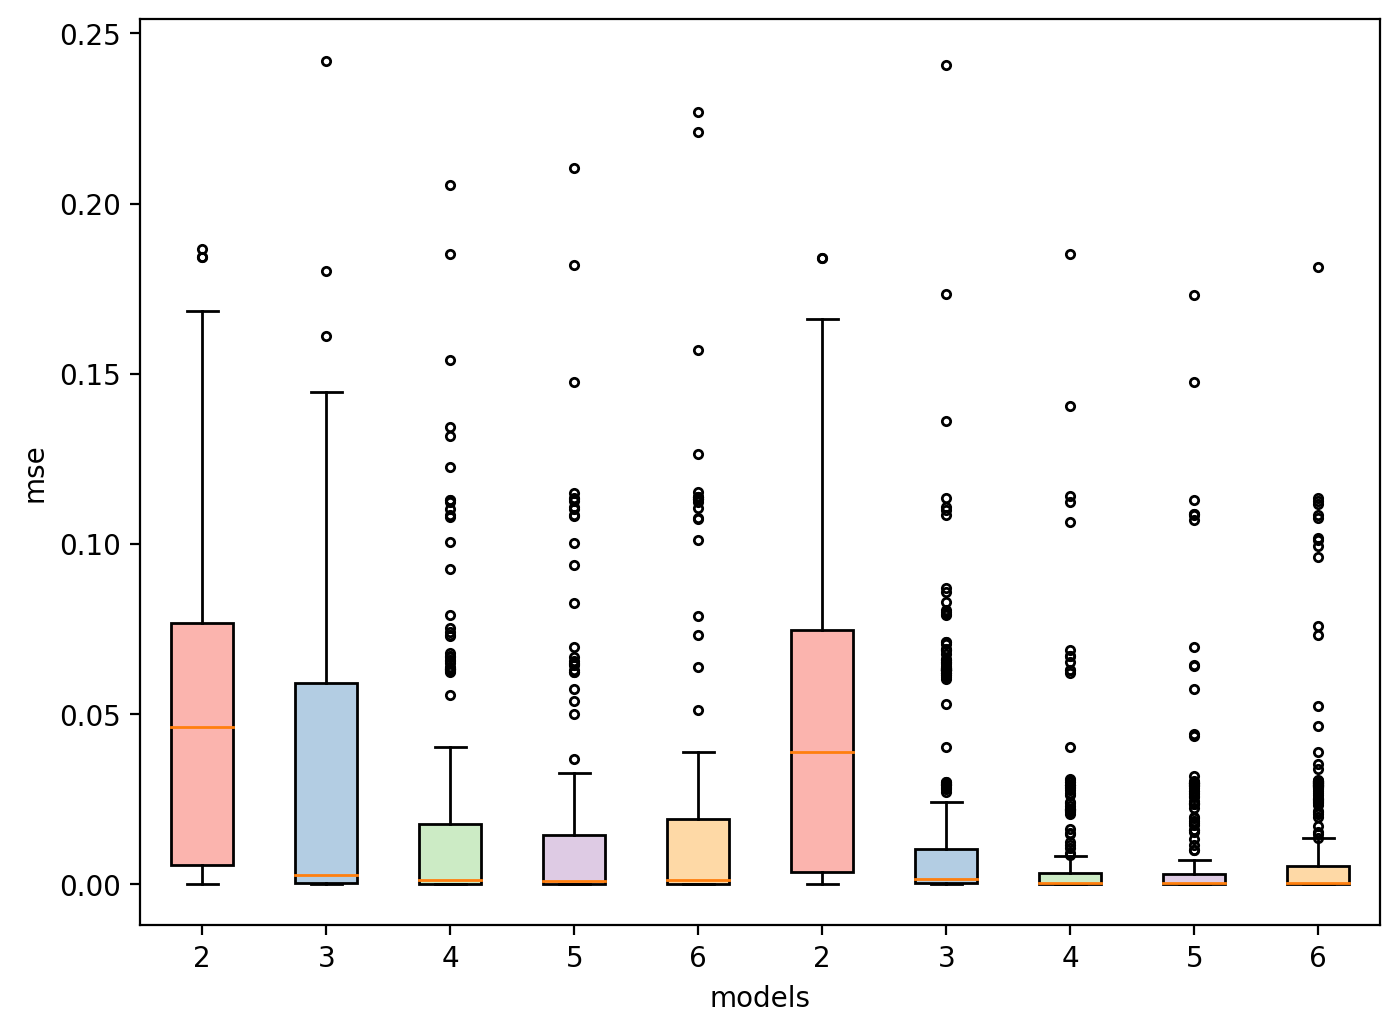

In [7]:
data_6 = np.concatenate([data_1, data_4])

labels = ['2', '3', '4', '5', '6', '2', '3', '4', '5', '6']

plt.figure(figsize=(8, 6), dpi=200)
boxplot1 = plt.boxplot(data_5.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%5])
plt.xlabel('models')
plt.ylabel('mse')
#plt.title('compare between seed=0 and seed=012')
plt.savefig('figures/boxplot.png')
plt.show()

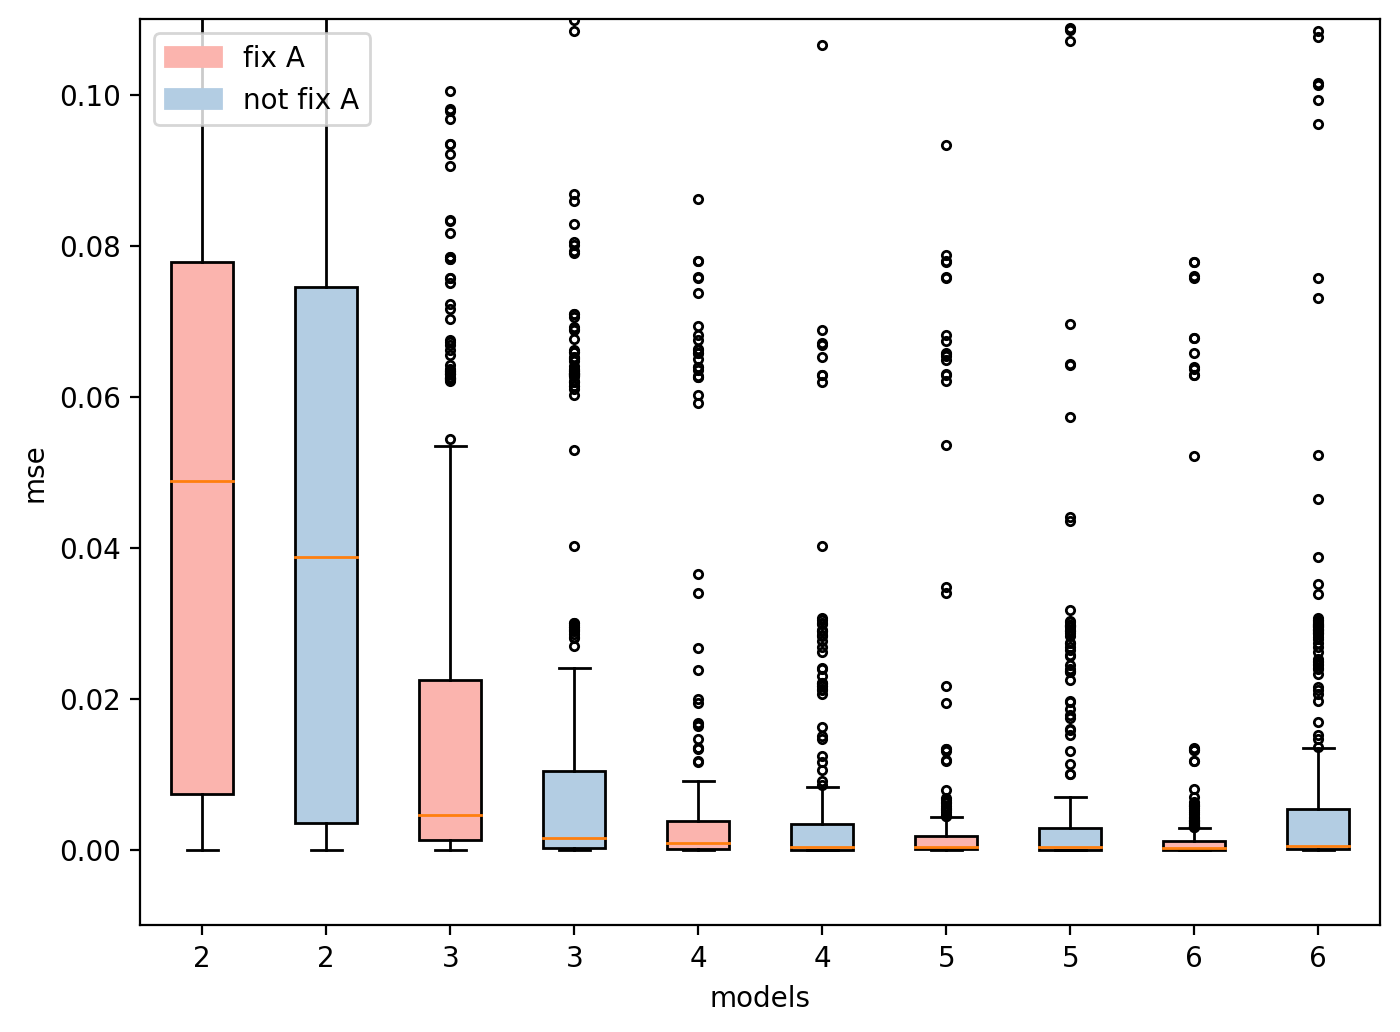

In [15]:
import matplotlib.patches as mpatches


data_6 = np.concatenate([data_1, data_4])
data_7 = data_6[[0,5,1,6,2,7,3,8,4,9]]

labels = ['2','2','3','3','4','4','5','5','6','6']

plt.figure(figsize=(8, 6), dpi=200)
boxplot1 = plt.boxplot(data_7.T, sym='.', patch_artist=True, labels=labels)
for i in range(len(boxplot1['boxes'])):
    boxplot1['boxes'][i].set_facecolor(color_list[i%2])
plt.xlabel('models')
plt.ylabel('mse')
plt.ylim([-0.01, 0.11])

red_patch = mpatches.Patch(color=color_list[0], label='fix A')
blue_patch = mpatches.Patch(color=color_list[1], label='not fix A')
plt.legend(handles=[red_patch, blue_patch])

plt.savefig('figures/boxplot.png')
plt.show()

In [24]:
from scipy.stats import binomtest

for i in range(5):
    sign_data = (data_1[i] - data_4[i]) > 0
    result = binomtest(k=np.sum(sign_data), n=len(sign_data), p=0.5, alternative='two-sided')
    print(result)

BinomTestResult(k=204, n=288, alternative='two-sided', proportion_estimate=0.7083333333333334, pvalue=1.1071739244930001e-12)
BinomTestResult(k=215, n=288, alternative='two-sided', proportion_estimate=0.7465277777777778, pvalue=2.0984494243321448e-17)
BinomTestResult(k=181, n=288, alternative='two-sided', proportion_estimate=0.6284722222222222, pvalue=1.533122974393091e-05)
BinomTestResult(k=142, n=288, alternative='two-sided', proportion_estimate=0.4930555555555556, pvalue=0.8597229188081303)
BinomTestResult(k=117, n=288, alternative='two-sided', proportion_estimate=0.40625, pvalue=0.001741753283863699)
